In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris=pd.read_excel(r"C:\Users\user\Downloads\iris.xls")

In [3]:
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
print(iris.shape)

(150, 5)


In [8]:
print(iris.columns)

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')


In [9]:
iris["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# 2-D Scatter Plot

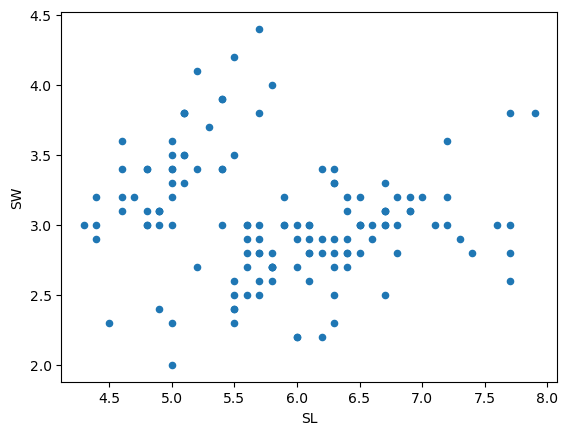

In [10]:
iris.plot(kind='scatter',x='SL',y='SW');
plt.show()

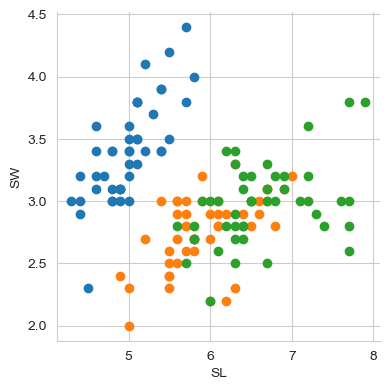

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="Classification",height=4)\
.map(plt.scatter,"SL","SW");
plt.show();

# Observation(s)

# Preprocessing The Dataset

In [12]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
iris.SL=iris.SL.fillna(iris.SL.mean())

In [14]:
iris.SW=iris.SW.fillna(iris.SW.mean())

In [15]:
iris.PL=iris.PL.fillna(iris.PL.mean())

In [16]:
iris.PW=iris.PW.fillna(iris.PW.mean())

In [17]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

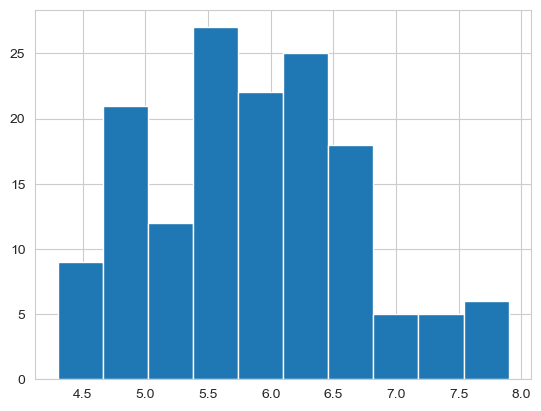

In [18]:
iris['SL'].hist()

<AxesSubplot:>

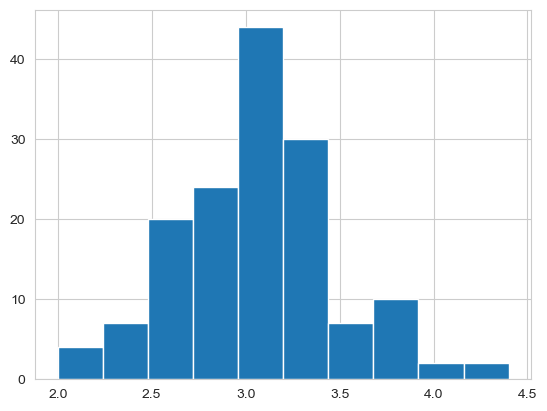

In [19]:
iris['SW'].hist()

<AxesSubplot:>

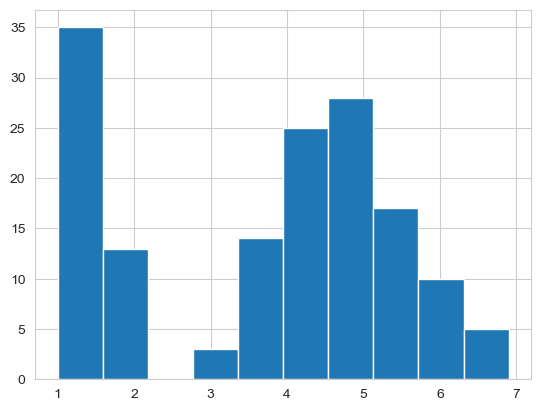

In [20]:
iris['PL'].hist()

<AxesSubplot:>

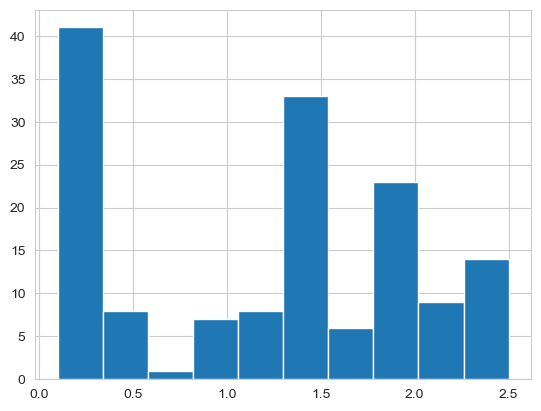

In [21]:
iris['PW'].hist()

In [22]:
colors=['red','orange','blue']
Classification=['Iris-setosa','Iris-versicolor','Iris-virginica']

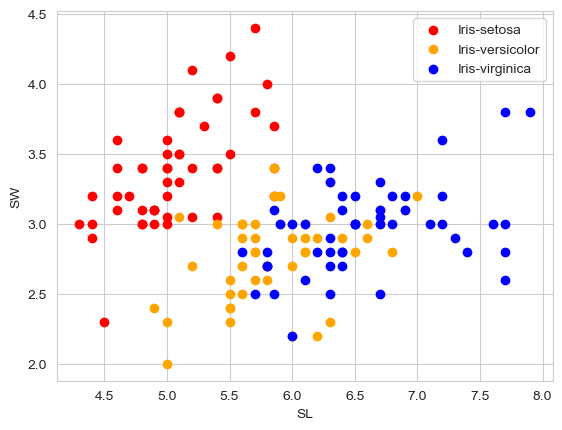

In [23]:
for i in range(3):
    x=iris[iris['Classification']==Classification[i]]
    plt.scatter(x['SL'],x['SW'],c=colors[i],label=Classification[i])
    plt.xlabel("SL")
    plt.ylabel("SW")
    plt.legend()

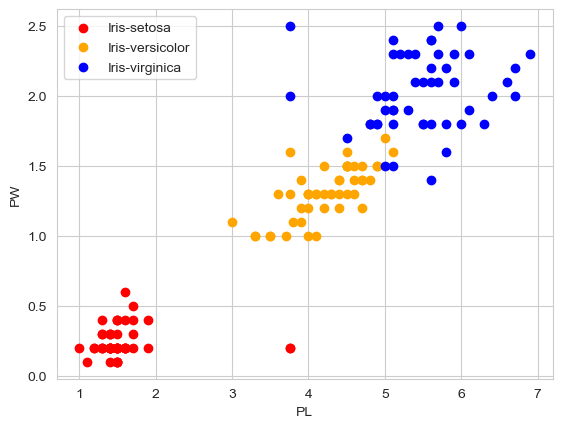

In [24]:
for i in range(3):
    x=iris[iris['Classification']==Classification[i]]
    plt.scatter(x['PL'],x['PW'],c=colors[i],label=Classification[i])
    plt.xlabel("PL")
    plt.ylabel("PW")
    plt.legend()

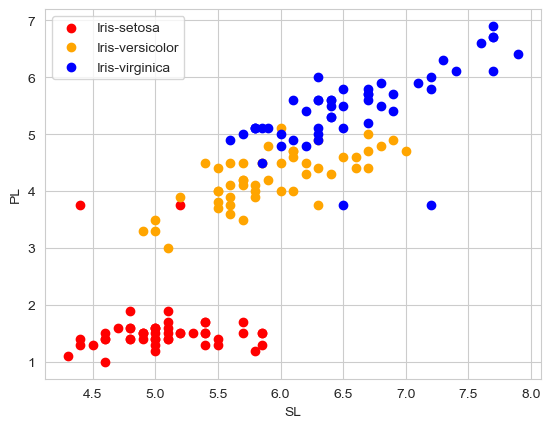

In [25]:
for i in range(3):
    x=iris[iris['Classification']==Classification[i]]
    plt.scatter(x['SL'],x['PL'],c=colors[i],label=Classification[i])
    plt.xlabel("SL")
    plt.ylabel("PL")
    plt.legend()

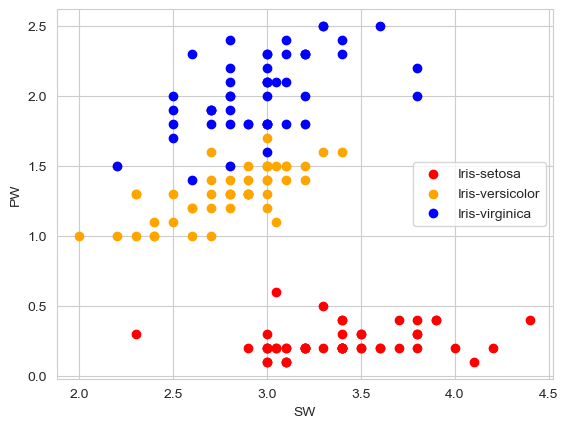

In [26]:
for i in range(3):
    x=iris[iris['Classification']==Classification[i]]
    plt.scatter(x['SW'],x['PW'],c=colors[i],label=Classification[i])
    plt.xlabel("SW")
    plt.ylabel("PW")
    plt.legend()

# Correlation Matrix

In [27]:
iris.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099250,0.831400,0.800726
SW,-0.099250,1.000000,-0.413551,-0.340278
PL,0.831400,-0.413551,1.000000,0.936389
PW,0.800726,-0.340278,0.936389,1.000000


<AxesSubplot:>

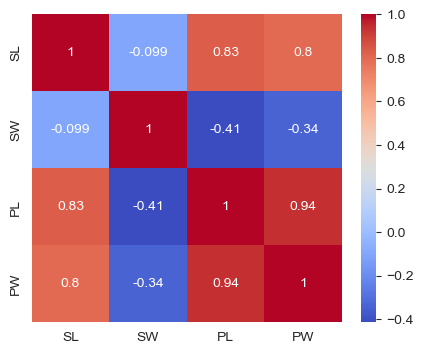

In [28]:
corr=iris.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

# Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
iris['Classificaion']=le.fit_transform(iris['Classification'])
iris.head()

,SL,SW,PL,PW,Classification,Classificaion
0,5.100000,3.5,1.4,0.2,Iris-setosa,0
1,4.900000,3.0,1.4,0.2,Iris-setosa,0
2,5.855944,3.2,1.3,0.2,Iris-setosa,0
3,4.600000,3.1,1.5,0.2,Iris-setosa,0
4,5.000000,3.6,1.4,0.2,Iris-setosa,0


In [31]:
iris.apply(lambda x: pd.Series(x.dropna().values))

,SL,SW,PL,PW,Classification,Classificaion
0,5.100000,3.5,1.40000,0.2,Iris-setosa,0
1,4.900000,3.0,1.40000,0.2,Iris-setosa,0
2,5.855944,3.2,1.30000,0.2,Iris-setosa,0
3,4.600000,3.1,1.50000,0.2,Iris-setosa,0
4,5.000000,3.6,1.40000,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica,2
146,6.300000,2.5,5.00000,1.9,Iris-virginica,2
147,6.500000,3.0,3.75625,2.0,Iris-virginica,2
148,6.200000,3.4,5.40000,2.3,Iris-virginica,2


In [32]:
iris.SL=iris.SL.fillna(iris.SL.mean())
iris.SL=iris.SW.fillna(iris.SW.mean())
iris.PL=iris.PL.fillna(iris.PL.mean())
iris.PW=iris.PW.fillna(iris.PW.mean())

In [33]:
iris['Classificaion']=le.fit_transform(iris['Classification'])
iris.head()

,SL,SW,PL,PW,Classification,Classificaion
0,3.5,3.5,1.4,0.2,Iris-setosa,0
1,3.0,3.0,1.4,0.2,Iris-setosa,0
2,3.2,3.2,1.3,0.2,Iris-setosa,0
3,3.1,3.1,1.5,0.2,Iris-setosa,0
4,3.6,3.6,1.4,0.2,Iris-setosa,0


# Model Training

In [43]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=iris.drop(columns=['Classification'])
Y=iris['Classification']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [44]:
#Logistic Reggression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [45]:
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [47]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [48]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


F:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [51]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0
